In [2]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from datetime import datetime
import json
import statistics
import matplotlib.pyplot as plt
from matplotlib import lines
import seaborn as sbn
import math

#----------------------------------------------------------------------
# IMPORTA OS DADOS DA EMPACOTADORA (FLOWPACK) EM UM DICT JSON
#----------------------------------------------------------------------
def Carrega_FlowPack():
    url = "https://dry-plateau-13546.herokuapp.com/flowpack"
    response = urlopen(url)

    dict_json = json.loads(response.read())
    return pd.DataFrame(dict_json['rows'])

In [9]:
def Exibir_Estatisticas():
    print("------------------------------------------------------------")
    print("QUANTIDADE DE MAQUINA REGISTRADAS: ",maquina_pd['id'].max())
    print("------------------------------------------------------------")
    Estatisticas_gerais_velocidade()
    Estatisticas_gerais_produtos()
    Estatisticas_gerais_embalagens()

In [5]:
def Estatisticas_gerais_velocidade():
    print("--------------------------------------------------------------------------------")
    print("               ESTATÍSTICAS GERAIS PARA VELOCIDADE DAS MAQUINAS")
    print("================================================================================")
    filtro = maquina_pd[maquina_pd['velocidade_maquina'] == maquina_pd['velocidade_maquina'].max()]
    v = filtro['velocidade_maquina'].max()
    id1 = filtro['id'].max()
    print(f'MAIOR VELOCIDADE registrada para a máquina        : {v: >6.2f} - máquina {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = maquina_pd[maquina_pd['velocidade_maquina'] == maquina_pd['velocidade_maquina'].min()]
    v = filtro['velocidade_maquina'].min()
    id1 = filtro['id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'MENOR VELOCIDADE registrada para a máquina        : {v: >6.2f} - máquina {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    print("--------------------------------------------------------------------------------")
    v = np.mean(maquina_pd['velocidade_maquina'])
    print(f'VELOCIDADE MÉDIA registrada para a máquina        : {v: >6.2f}')

    v = statistics.mode(maquina_pd['velocidade_maquina'])
    print(f'VELOCIDADE MAIS FREQUENTE para a máquina          : {v: >6.2f}')

    v = np.std(maquina_pd['velocidade_maquina'])
    print(f'DESVIO PADRÃO na velocidade para a máquina        : {v: >6.2f}')
    print("--------------------------------------------------------------------------------")

In [6]:
def Estatisticas_gerais_produtos():
    print("--------------------------------------------------------------------------------")
    print("               ESTATÍSTICAS GERAIS PARA QDE DE PRODUTOS EMBALADOS")
    print("================================================================================")
    filtro = maquina_pd[maquina_pd['quantidade_produtos_embalados'] == maquina_pd['quantidade_produtos_embalados'].max()]
    v = filtro['quantidade_produtos_embalados'].max()
    id1 = filtro['id'].max()
    print(f'MAIOR QDE DE PRODUTOS EMBALADOS para a máquina               : {v: >6.2f} - máquina {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = maquina_pd[maquina_pd['quantidade_produtos_embalados'] == maquina_pd['quantidade_produtos_embalados'].min()]
    v = filtro['quantidade_produtos_embalados'].min()
    id1 = filtro['id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'MENOR QDE DE PRODUTOS EMBALADOS para a máquina               : {v: >6.2f} - máquina {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    print("--------------------------------------------------------------------------------")
    v = np.mean(maquina_pd['quantidade_produtos_embalados'])
    print(f'MAIOR QDE MÉDIA DE PRODUTOS EMBALADOS para a máquina         : {v: >6.2f}')

    v = statistics.mode(maquina_pd['quantidade_produtos_embalados'])
    print(f'QDE DE PRODUTOS EMBALADOS MAIS FREQUENTE para a máquina      : {v: >6.2f}')

    v = np.std(maquina_pd['quantidade_produtos_embalados'])
    print(f'DESVIO PADRÃO para QDE DE PRODUTOS EMBALADOS                 : {v: >6.2f} - máquina {id1}')
    print("--------------------------------------------------------------------------------")

In [7]:
def Estatisticas_gerais_embalagens():
    print("--------------------------------------------------------------------------------")
    print("               ESTATÍSTICAS GERAIS PARA QDE DE EMBALAGENS UTILIZADAS")
    print("================================================================================")
    filtro = maquina_pd[maquina_pd['quantidade_embalagens'] == maquina_pd['quantidade_embalagens'].max()]
    v = filtro['quantidade_embalagens'].max()
    id1 = filtro['id'].max()
    print(f'MAIOR QDE DE EMBALAGENS UTILIZADAS para a máquina               : {v: >6.2f} - máquina {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = maquina_pd[maquina_pd['quantidade_embalagens'] == maquina_pd['quantidade_embalagens'].min()]
    v = filtro['quantidade_embalagens'].min()
    id1 = filtro['id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'MENOR QDE DE EMBALAGENS UTILIZADAS para a máquina               : {v: >6.2f} - máquina {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    print("--------------------------------------------------------------------------------")
    v = np.mean(maquina_pd['quantidade_embalagens'])
    print(f'MAIOR QDE MÉDIA DE EMBALAGENS UTILIZADAS para a máquina         : {v: >6.2f}')

    v = statistics.mode(maquina_pd['quantidade_embalagens'])
    print(f'QDE DE EMBALAGENS UTILIZADAS MAIS FREQUENTE para a máquina      : {v: >6.2f}')

    v = np.std(maquina_pd['quantidade_embalagens'])
    print(f'DESVIO PADRÃO na QDE DE EMBALAGENS UTILIZADAS                   : {v: >6.2f}')
    print("--------------------------------------------------------------------------------")

In [8]:
def Graficos_Barras(titulo,eixoy,df,tipo,passo):
    plt.subplots(figsize=(15,9))
    
    valores_x = np.array(df['id'])

    if tipo == 1:
        valores_y = np.array(df['velocidade_maquina'])
    elif tipo == 2:
        valores_y = np.array(df['quantidade_produtos_embalados'])
        valores_y = valores_y / 1000
    elif tipo == 3:
        valores_y = np.array(df['quantidade_embalagens'])
        valores_y = valores_y / 10000

    bar = sbn.barplot(x=valores_x, y=valores_y, data=df, color = "Blue")
    bar.set_title(titulo, fontdict={'family': 'tahoma','fontsize':20}, loc='center')
    bar.set_xticks(np.arange(0, max(valores_x), step=5))
    bar.set_yticks(np.arange(0, max(valores_y)+passo, step=passo))
    bar.set_xlabel("MÁQUINAS", fontdict={'family': 'tahoma','fontsize':16}, loc='center')
    bar.set_ylabel(eixoy, fontdict={'family': 'tahoma','fontsize':16}, loc='center')
    for j in np.arange(0,max(valores_y)+passo,passo):
        bar.axhline(y=j, xmin=0, color="Black", linewidth=0.3)


Quantidade de maquinas registradas:  89


findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.
findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.


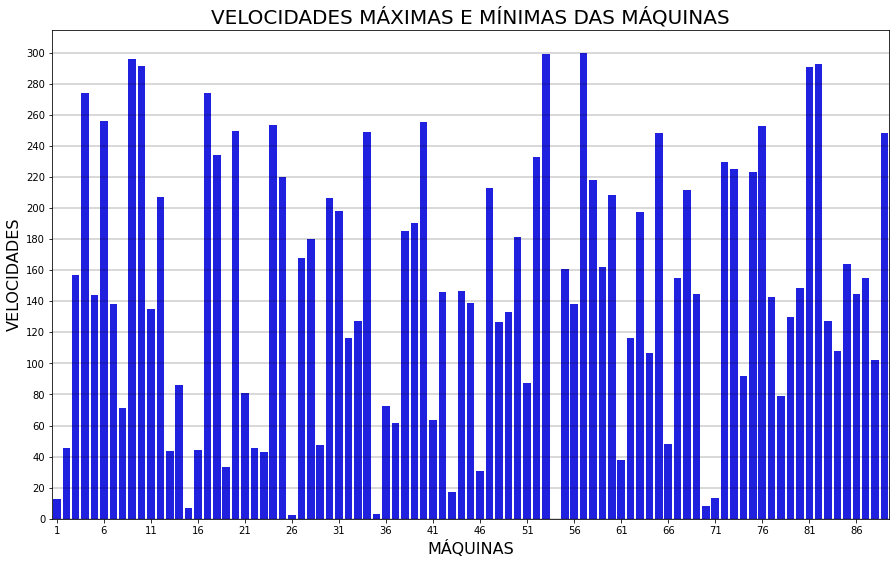

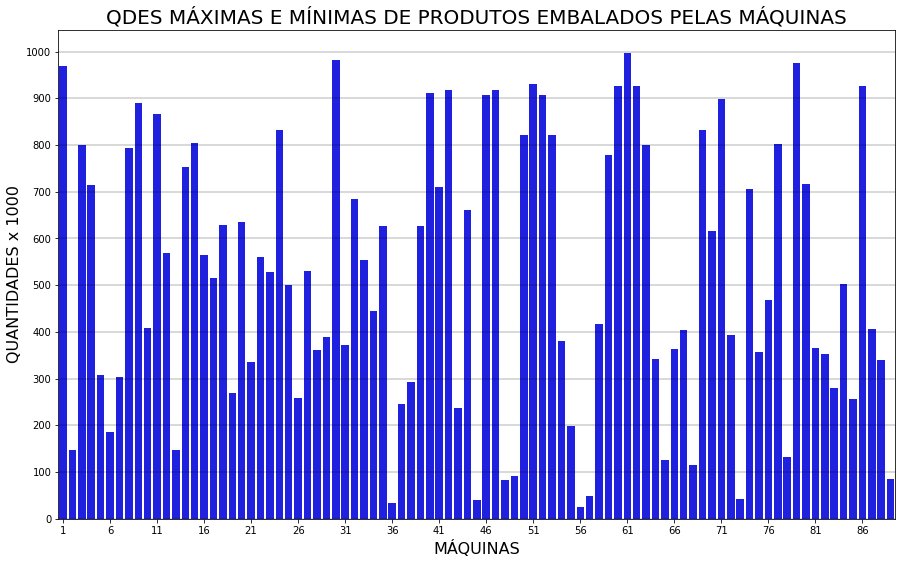

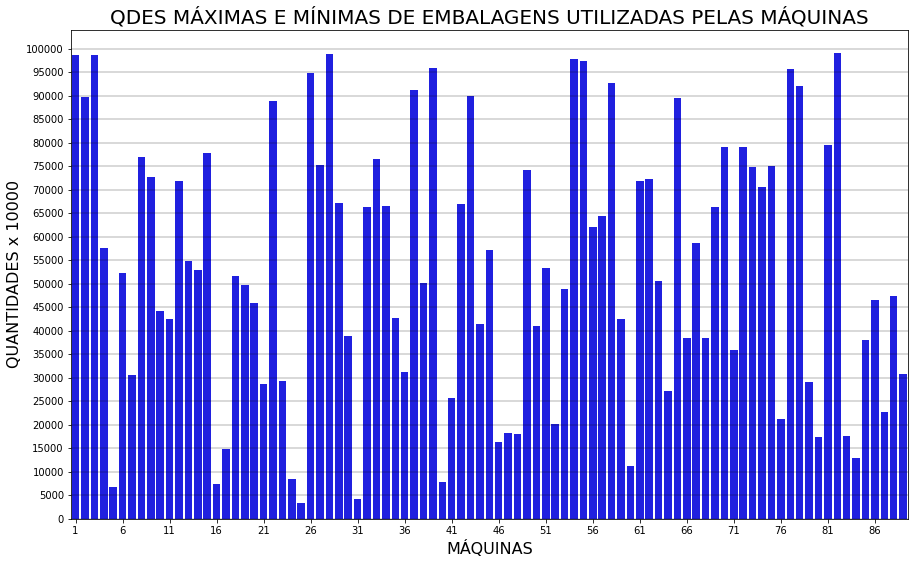

In [9]:
#----------------------------------------------------------------------
# ROTINA PRINCIPAL
#----------------------------------------------------------------------
maquina_pd = Carrega_FlowPack()

qde_maquinas = len(maquina_pd)
print("Quantidade de maquinas registradas: ",qde_maquinas)
#maquina_pd.head(10)

#Exibir_Estatisticas()

Graficos_Barras('VELOCIDADES MÁXIMAS E MÍNIMAS DAS MÁQUINAS','VELOCIDADES',maquina_pd,1,20)
Graficos_Barras('QDES MÁXIMAS E MÍNIMAS DE PRODUTOS EMBALADOS PELAS MÁQUINAS','QUANTIDADES x 1000',maquina_pd,2,100)
Graficos_Barras('QDES MÁXIMAS E MÍNIMAS DE EMBALAGENS UTILIZADAS PELAS MÁQUINAS','QUANTIDADES x 10000',maquina_pd,3,5000)